### Updates since going online:

- I have added a lot to the bottom of this document, in the section "Mathematical Models"
- I corrected the "flow diagram" for the heterogeneous mean-field.
- simplified the discussion around threshold condition for mean-field SIR (to mimic what we did in lecture)
- added discussion about why the peak in prevalence ($I$) occurs (as we did in lecture).
- simplified discussion of threshold condition for heterogeneous mean-field SIR to be more like what we did for the plain mean-field model in lecture.
- added discussion of phase transitions.

## Mathematical Modeling of SIR epidemics on Networks

We are now going to look at various tools which have been developed to predict the behavior of SIR epidemics on networks.

### $R_0$

What determines if epidemic outbreaks are possible?  If an average "early infection" would cause more than one new infection, then we expect that epidemics are possible (but not guaranteed).  Once we have identified what typical early infection look like then:

**$R_0$ is the expected number of additional infections each "early infection" would cause before recovery**.  Right now we're just going to assume that $R_0$ exists for any network and disease, and discuss what properties it should have.  It turns out that for some networks it can sometimes be hard to clearly define it.


If the early infections cause on average less than $1$ new infection, then epidemics do not happen.  If the expected number is greater than $1$, then epidemics have positive probability but they might not happen.  If we start with enough infections, then we should see an epidemic occur.  

But what exactly is a typical early infection?  The next few examples will hopefully clarify this.

In each example below, the average degree is $4$.  We take a transmission probability of $1/4$ or close to $1/4$ and start with 100 nodes of the population randomly infected.  If epidemics are possible, at least one of these infections should trigger it.  However, since the networks have 100,000 or 1,000,000 nodes, this is a small fraction.  

Before running the code, look at the transmission probabilities and the degree distribution.  Do you think $R_0$ is bigger than $1$ in each case?  Once you've made up your mind run the simulation and see whether there is sustained growth early on or whether things decay soon after it begins.

In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt

plt.clf()

N=100000
deg_dist = [4]*N

G = nx.configuration_model(deg_dist)
#G is a graph for which all nodes have degree **exactly** 4

p = 0.26
t, S, I, R = EoN.basic_discrete_SIR(G, p, rho = 0.001)

plt.clf()
plt.plot(t, I)
plt.show()

In the code above we start with a large network.  There are many infections, but they make up a small fraction (0.1%).  

Every node has degree 4.  The transmission probability is just over $1/4$.  So we might expect epidemics to occur.

We see that in the very first time step there is some growth which is because the initial infections cause more than 1 infection on average.

However, after that, **the infected individuals have only 3 susceptible neighbors**.  Since $3p<1$, he number of infections dies off geometrically after that.

If the quantity $R_0$ is meaningful here, it must be the case that $R_0<1$.  In fact, with the expression we'll derive later it is $0.26*3=0.78$.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

N = 100000
G = nx.configuration_model([1,7]*(N//2))

p = 0.24

t, S, I, R = EoN.basic_discrete_SIR(G, p, rho = 0.001)

plt.clf()
plt.plot(t, I)
plt.show()

In this case, in the initial generation half have each degree $1$ or $7$.  So the average is $4$.  Since $4p<1$, there is a drop in the first step (but it is small).  After that first generation, we see many more degree $7$ individuals infected than degree $1$ individuals.  Most newly infected degree $7$ individuals will have $6$ susceptible partners, leading to $6p \approx 1.5$ new infections each.  Since the degree $7$ individuals make up a large fraction of the infected population, this is enough to produce growth.

Here $R_0>1$.  In fact, with the expression we'll derive below, it is $0.24 (21/4)=1.26$.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

N=1000000
G = nx.fast_gnp_random_graph(N, 4/(N-1))
p=0.25

t, S, I, R = EoN.basic_discrete_SIR(G, p, rho = 0.0001)

plt.clf()
plt.plot(t, I)
plt.show()

(Try running this simulation several times since stochasticity is fairly significant)

Compare how long the outbreak persists with the our first  case where $R_0<1$.

For an Erdős–Rényi network with average $4$ the two competing effects we saw above exactly cancel.  That is, the fact that higher degree individuals are preferentially infected is exactly cancelled by the fact that they each have $1$ less than their degree available to infect.  The result is that the outbreak can persist for a long period without significant growth before it eventually dies out.

$R_0$ for this network is $1$.

### The "Excess Degree" of a node

To understand $R_0$, it's clear that one of the things we need to look at is how many susceptible neighbors a newly infected node will have.  For networks without clustering, it is reasonable to assume that early in an outbreak, if a degree $k$ node becomes infected, then it will have $k-1$ susceptible neighbors, because one neighbor (its infector) is infected.

We will focus on Configuration Model networks, which are unclustered as long as the typical degrees are much less than the population size $N$.  We use $P(k)$ to denote the probability a randomly selected node has degree $k$ and $P_n(k)$ to be the probability a randomly selected neighbor of a given node has degree $k$.

For a network with small clustering, we define $k-1$ to be the **"excess degree"** of the node.  

Then $R_0$ should be the average excess degree early in the epidemic times the transmission probability.
\begin{equation*}
R_0 = p \sum_{k} P_n(k) (k-1)
\end{equation*}

It is worth noting that although $P(k)$ [for the initial infections] and $P_n(k)$ [for the next generation] are different, in the limit of a very large Configuration Model network, subsequent generations also have the same distribution $P_n(k)$.  So an "early infection" has degree chosen from the distribution given by $P_n(k)$.

### Size Biasing of early infections

We have observed that the probability of infection early in the epidemic is higher for high degree nodes.

Let's revisit this.  In the lecture on random graphs, I asked you to select a random node, and then look at who you reach following a random edge.  Here are those graphs again:

<img src="CM_generationneg1.png" width="300"/>

<img src="CM_generation0.png" width="300"/>

<img src="final_circle.png" width="300"/>

We saw that it's more likely that we end up at a degree $3$ node when we visit the neighbor of a node than at a degree $1$ node.  Let's see how this plays out in general.

Assume we are in a large Configuration Model network where $P(k)$ gives the probability of having degree $k$.  When a node selects the connection for one of its stubs, it's choosing uniformly from the available stubs.  To find the probability $P_n(k)$ of choosing to connect to a stub from a degree $k$ node, we need to know the total number of stubs connecting to degree $k$ nodes and the total number of nodes.

In a population of $N$ nodes, the number of stubs of degree $k$ nodes is $k P(k)N$ (there are $N$ nodes, meaning that $P(k)N$ of the nodes have degree $k$, and thus there are $k P(k) N$ total stubs from degree $k$ nodes.

In the entire population, there are $\sum_k k P(k) N$ total stubs.  Defining $\langle K \rangle = \sum_k k P(k)$ to be the average degree, we have $N \langle K \rangle$ total stubs.

So the probability of choosing a stub from a given degree $k$ is 
\begin{align*}
P_n(k) &= \frac{k P(k) N}{N \langle K \rangle}\\
&= \frac{k P(k)}{\langle K \rangle}
\end{align*}
This gives us
\begin{equation*}
R_0 = p \sum_k (k-1) P_n(k) = p \frac{\langle K^2-K\rangle}{\langle K \rangle} 
\end{equation*}

The fact that the numerator depends on $\langle K^2 \rangle$ reflects the fact that high degree individuals get infected with probability proportional to their degree and once infected the number of transmissions they cause is also roughly proportional to their degree.


### Power law networks

The Erdős–Rényi networks have relatively "narrow" degree distributions.  Sexual networks have much broader degree distributions.  That is: in an  Erdős–Rényi network, if one node has more edges than others, this isn't because of an intrinsic property of the node, but rather because of random chance.  In a sexual network, there are individuals who simply aquire partners at a much higher rate.

Let's look at an Erdős–Rényi network's degree distribution.  We're going to look at it in two ways: the probability of having a given degree $k$ and the probability of having degree at least $k$.


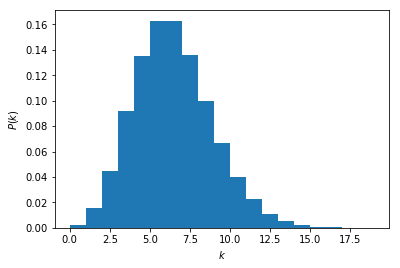

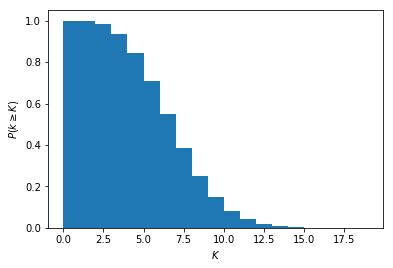

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib                          #these last 2 imports are
from distutils.version import LooseVersion #used to check 
                                           #matplotlib version

N=100000
kave = 6
G = nx.fast_gnp_random_graph(N, kave/(N-1))

Degs = [G.degree(node) for node in G.nodes()]

if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    plt.hist(Degs, bins = range(20), density=True)
else:
    plt.hist(Degs, bins = range(20), normed=True)
plt.ylabel('$P(k)$')
plt.xlabel('$k$')
plt.show()
plt.clf()
if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    plt.hist(Degs, bins = range(20), cumulative = -1, density=True)
else:
    plt.hist(Degs, bins = range(20), cumulative = -1, normed=True)
plt.ylabel(r'$P(k\geq K)$')
plt.xlabel('$K$')
    
plt.show()

For sexual neworks, a 2001 paper (The web of human sexual contacts) found that the probability of having at least $K$ partners in the last 12 months (left) or over having had at least $K$ partners ever (right) followed a very different pattern from the Erdős–Rényi networks.  There are many more high-degree individuals: 

<img src="sexual_PL.png" width="600"/>

An argument has been made that the degree distribution of sexual networks has $P(k) \sim k^{-\gamma}$ where $\gamma$ appears to lie between $2$ and $3$ (at least for large $k$).  Then taking $P(k) \approx r k^{-\gamma}$ for $k \geq K$, the contribution of these large degree nodes to the average degree $\langle k \rangle$ is close to
\begin{align*}
\int_K^\infty k r k^{-\gamma} \, dk &= r \int_K^\infty k^{1-\gamma} \, dk \\
&= r \left. \frac{k^{2-\gamma}}{2-\gamma} \right|_K^\infty\\
& < \infty
\end{align*}
[recall $2-\gamma<0$]
But if we now look at $\langle k^2 \rangle$, we find that for $\gamma$ between $2$ and $3$, this becomes infinite.

So, $R_0$ is infinite for these networks.

#### A Major Caveat

The calculation of $R_0$ assumes that all edges have equal transmission probability.  However, in a sexual network, those people who are at the high end are changing partners faster.  They are having fewer interactions per partner.  For some sexually transmitted diseases, the transmission probabilities are very low.  HIV has a transmission rate that is probably less than $1$% per sex act.  Frequency of having sex probably has a pretty hard cut-off at the high end (though I don't think I've actually seen the data on this).  So ultimately $R_0$ is actually finite.



### Herd immunity

We have found that $R_0$ for a Configuration Model network should be 
\begin{equation*}
R_0 = p \frac{\langle K^2-K \rangle}{\langle K \rangle}
\end{equation*}

If a proportion of the population is randomly vaccinated, then some of these edges will point to immune individuals.  In this case, we define $R_{e}$ to be **"$R$-effective"**.  This is the reproductive number after accounting for the existing immunity of the population.

If we can vaccinate enough individuals such that $R_{e}$  is less than $1$, then we expect no epidemics.

#### Vaccination Strategies
Obviously vaccination is an important way to achieve herd immunity.  There are various strategies for choosing the indivdiuals to be vaccinated.

- **Random vaccination**

  If we vaccinate randomly-chosen individuals this will not affect the degree of a typical infected individual, however, the probability one of that individual's neighbors is susceptible is reduced.  Then $R_e$ is the unvaccinated proportion time $R_0$.  Our goal is typically to vaccinate enough that $R_e<1$.  If we vaccinate a proportion $V$ of the population, then our target is $(1-V)R_0 < 1$.  Solving for $V$ in terms of $R_0$, we find $V + 1- 1/R_0$.
  
  For Measles, which has $R_0$ close to $20$, this suggests we need to vaccinate $19$ out of every $20$ individuals to prevent an epidemic. Unforutnately, even this is often not enough.  The individuals who decline vaccination are likely to be part of the same community.  So even if we achieve the $95$% target, if that is heterogeneously distributed, there will be a subset that is susceptible to epidemics.
  
  
- **Highest degree vaccination**

  High degree individuals are important both because they are infected sooner and because they cause more infections.  So it seems reasonable to target these individuals because it maximizes the impact of each vaccine on $R_0$.
  
  However, there is a practical challenge.  How do we select the highest degree individuals to vaccinate?  In real-life we usually don't actually know the true network structure.

- **Acquaintance vaccination**

  An option for preferentially identifying the high-degree individuals is through "acquaintance vaccination".  Ask people to nominate one of their partners for vaccination.  This is imperfect, but would tend to increase the degree of those who are vaccinated.





## Epidemic Probability

We've talked about the fact that epidemics only happen with $R_0>1$, and we've seen that even then if we start with a single infection, they are not inevitable.

So, let's see if we can calculate the epidemic probability analytically.  We'll do this in the limit of an infinite population, with Configuration Model assumptions.  The actual calculation we'll do is whether or not the outbreak dies out in a finite number of generations.  If not, then we assume it is an epidemic outbreak.  If so, then it is a non-epidemic outbreak.

For future use, we'll define
\begin{equation*}
\psi(x) = \sum_k P(k) x^k
\end{equation*}
Note that
\begin{equation*}
\langle K \rangle = \psi'(1)
\end{equation*}

We will consider the discrete-time version of the model.

A **key observation** is that after the (randomly chosen) initial infection which has degree $k$ with probability $P(k)$, all other individuals to be infected have degree k with probability $P_n(k) = k P(k) / \langle K \rangle$.  These individuals have an excess degree of $k-1$.  Let's call these individuals "subsequent cases"

Define $\alpha_g$ to be the probability that a subsequent case has no descendents after $g$ or more generations lower (So $\alpha_1 \leq \alpha_2 \leq \cdots \leq 1$).  We start by finding $\alpha_1$
\begin{align*}
\alpha_1 &= \sum_k P_n(k) (1-p)^{k-1}\\
&= \sum_k \frac{k P(k)}{\langle K \rangle} (1-p)^{k-1}\\
&= \frac{1}{\psi'(1)} \sum_k k P(k) (1-p)^{k-1}\\
&= \frac{\psi'(1-p)}{\psi'(1)}
\end{align*}
And more generally
\begin{align*}
\alpha_{g+1} &= \sum_k P_n(k) (1-p + p \alpha_g)^{k-1}\\
&= \frac{\psi'(1-p+p\alpha_g)}{\psi'(1)}
\end{align*}

So the probability of eventual extinction of all chains from a subsequent case is given by iterating this, starting with $\alpha_0=0$ until it converges to a limit.

Then once the limit $\alpha_\infty$ is found, the probability that the initial individual does not start an epidemic is
\begin{equation*}
\sum_k P(k) (1-p + p\alpha_\infty)^k = \psi(1-p+p\alpha_\infty)
\end{equation*}

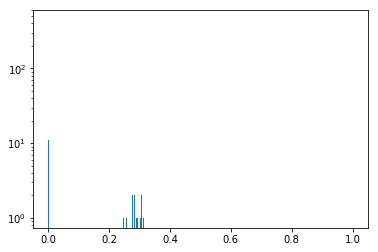

we're now plotting the probability of having at least a
 particular size, since this let's us see the probability of
 having something larger than an epidemic.


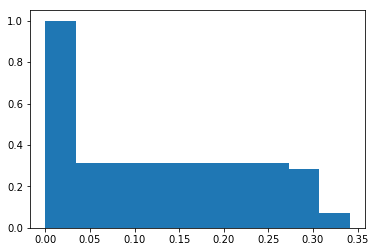

0.293612437504
0.41203990935733137
0.4762627130124413
0.5158229125401201
0.5419890613713909
0.5600855130686554
0.572979961607756
0.5823607595952979
0.5892877322311186
0.5944586746875065
0.5983499588931447
0.6012959548387158
0.6035364447695695
0.6052462565596337
0.6065545079521613
0.6075575123529008
0.6083276698114719
0.6089197305984748
0.6093752898389705
0.6097260616483503
Epidemic probability =  0.29565072737733256


In [31]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np

import matplotlib                          #these last 2 imports are
from distutils.version import LooseVersion #used to check 
                                           #matplotlib version

#let's look at epidemic probability in a population with P(1)=P(7)=1/2.

def psi(x):  #half have degree 1 and 7.
    return (x+x**7)/2  

def psiPrime(x):
    return (1+7*x**6)/2

p = 0.24  #we did this case above, but with many initial infections.
          #now we'll just do one.

iterations = 1000
sizes = []
N=10000
G = nx.configuration_model([1,7]*(N//2))
for counter in range(iterations):
    
    t, S, I, R = EoN.basic_discrete_SIR(G, p)
    sizes.append(R[-1]/N)

if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    plt.hist(sizes, bins = np.linspace(0,1, N+1))
else:
    plt.hist(sizes, bins = np.linspace(0,1, N+1))
plt.yscale('log')
plt.show()

print("we're now plotting the probability of having at least a\n",
      "particular size, since this let's us see the probability of\n",
      "having something larger than an epidemic.")

if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    plt.hist(sizes, cumulative = -1, density=True)
else:
    plt.hist(sizes,  cumulative = -1, normed=True)
plt.show()

#now let's try to find the epidemic probability
alpha = 0
for counter in range(20):
    alpha = psiPrime(1-p+p*alpha)/psiPrime(1)
    print(alpha)

print("Epidemic probability = ", 1-psi(1-p+p*alpha))
    

## Bond Percolation and SIR epidemics

Something curious happened in the calculation above.  The probability of an epidemic was very close to the size of the epidemic.

I don't think I'm going to discuss this in lecture, though it's one of my favorite aspects of SIR models on networks.  If you're interested, it's in the early part of Chapter 6 of the Mathematics of Epidemics on Networks book, and it's also in [this paper](https://scholar.harvard.edu/files/joelmiller/files/episizeprob.pdf)

In general you can convince yourself that these are the same for networks by the following argument:

If we take a graph $G$ and start a simulation, each time we come to an edge between a susceptible and an infected, we can choose a random number to determine whether the edge transmits.  We only do this at most once per edge.  So if we do the simulation in the straightforward way we'll get our result.

On the other hand, if we do the simulation in a not-so-obvious way we should get the same result.  Imagine that instead of doing the straightforward approach, we visit every edge in advance and decide (with probability $p$) whether it will transmit or not should one of the nodes become infected.  We delete those edges that will not transmit.  Once these decisions are made, the outcome is pre-determined.  Once we choose the initial infection, we just follow the transmitting edges.

Can we distinguish the outputs of these two simulations?  I claim you can't.  Each edge that gets a chance to transmit does so independently of all of the others with probability $p$.  [this may take a lot of reflection].

The two algorithms produce identical outcomes.  However, in the second, it is clear that the disease will reach exactly those nodes that are in the same connected component in the graph after deleting edges as the initial infection.  It turns out that above the epidemic threshold, the largest component is much larger than the others.  It is called the **Giant Component** So an epidemic happens iff the initial infection is in the giant component (*that is* it happens with probability equal to the proportion of nodes in the largest component).  It infects all nodes in that component (*that is* the proportion infected if an epidemic happens equals the proportion of nodes in the giant component).  Thus they are equal.

The calculation changes if the transmissions are not independent or there is some direction.  This happens, for example, when duration of infection varies: the transmissions $u \to v$ and $u \to w$ both depend on the duration of $u$'s infection, so they are not independent.

## Mathematical Models
There have been many attempts to write down models that reproduce the dynamics of infection.

These approaches somehow divide the population into $S$, $I$, and $R$ compartments.  These models are all derived in the Mathematics of Epidemics on Networks text.  

Based on how we group the nodes or edges together, we are making claims that all the ones put together are somehow indistinguishable.  This is not generally true: if we put high and low degree individuals together, the high-degree individuals are infected first.

We're going to do this for the continuous-time version.  Here is a simple example of a continuous time simulation.  We'd like to be able to predict the behavior.

We're going to compare several differential equation models with simulations.  

For a given graph, we would need to measure some properties and then use that to parameterize the model.  Luckily some fool put in the effort to [code up all of these models in EoN](https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html#analytic-toolkit), even to the point that you can feed it the graph and it will do all the remaining work for you.


In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt


G = nx.configuration_model([1,5,10]*50000)
N = G.order()

tau = 0.3
gamma = 1 #we can always assume gamma=1 because we can just change our 
          #unit of time.

t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = 0.001)
plt.plot(t,S, label='S')
plt.plot(t,I, label='I')
plt.plot(t,R, label='R')

plt.legend()
plt.show()


### Mean-field

[See chapter 4, in particular section 4.2 of Mathematics of Epidemics on Networks for a full derivation of this model, making explicit the assumptions.] 

In the mean-field model, we simply have $S$, $I$, and $R$ compartments.  

The average degree $\langle K\rangle$.  
We assume that
- Infected individuals have the same average degee as everyone else, so the probability a random individual's partner is infected is $I/N$.
- Susceptible individuals have average degree $\langle K \rangle$.
- Thus susceptible individuals have on average $\langle K \rangle I/N$ infected neighbors, each transmitting with rate $\tau$.  
- Once infected, individuals recover with rate $\gamma$.

[can you see that there are issues with the assumption that average degree of susceptible and infected individuals is the population average?  Also can you see a problem with the assumption that the number of susceptible/infected interactions is what you would predict from just random mixing?]

<img src="homogeneous_MF.png" width="600"/>

The total flux from $S$ to $I$ is  $S \frac{\tau \langle K \rangle I}{N}$. 

The total flux from $I$ to $R$ is $\gamma I$.


This produces the model:
\begin{align*}
\frac{d}{dt} S &= - \frac{ \tau S I \langle K \rangle}{N}\\
\frac{d}{dt} I &= \frac{ \tau S I \langle K \rangle}{N} - \gamma I\\
\frac{d}{dt} R &= \gamma I
\end{align*}

#### Comparison with simulation:

In `EoN`, this is encoded in `EoN.SIR_homogeneous_meanfield`.  [Here is the documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.SIR_homogeneous_meanfield.html#EoN.SIR_homogeneous_meanfield).
[I think this is the one example where `EoN` doesn't have a built in version to read in properties directly from the graph.  Luckily we just need the average degree, 4]

We'll compare this with simulations in the three populations we've looked at earlier (each with average degree $4$): an Erdős–Rényi network, a Configuration Model network with all having exactly $4$, and a Configuration Model network with half having degree $1$ and half degree $7$.

We'll set $\tau = 0.5$ and $\gamma = 1$.

First we'll do an Erdős–Rényi network with average 4

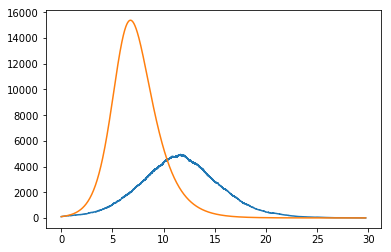

In [1]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

N=100000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

G = nx.fast_gnp_random_graph(N, kave/(N-1))

t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = rho)

calc_t, calc_S, calc_I, calc_R = EoN.SIR_homogeneous_meanfield(
                                 N*(1-rho), rho*N, 0, kave, tau, gamma,
                                 tmax = t[-1])

plt.plot(t, I)
plt.plot(calc_t, calc_I)
plt.show()

Now, that's not a very accurate prediction.  Maybe in the other graphs it is better?  Let's go ahead and do all 3 graphs at once (since the prediction is the same for all).  We'll do this by looping over the three graphs.



In [ ]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

plt.clf()

N=100000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

tmax = 0  #to be fed to the differential equations model.  Need to find 
          #the maximum seen in the loop.
    
for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = rho)
    plt.plot(t, I, label = label)
    tmax = max(tmax, t[-1])

calc_t, calc_S, calc_I, calc_R = EoN.SIR_homogeneous_meanfield(
                                 N*(1-rho), rho*N, 0, kave, tau, gamma,
                                 tmax = tmax)

plt.plot(calc_t, calc_I, '-.', label = 'prediction')
plt.legend()
plt.axis(xmax=20)
plt.show()


That's just generally doing terribly as a fit, but maybe we can still learn something. 

> All models are wrong, but some are useful

George Box

Because this model is so simple, it is easy for us to understand what causes different phenomena.  So if we see similar phenomena in our simulations or in the real-world, we have a better understanding of why it happens.  [Think about what you learn below, and see how well you can get that same insight from to the more complex models]

#### Peak prevalence

The value of $I$ in our prediction grows, reaches a peak, and then decays.  We can predict exactly the condition for the peak, by setting $dI/dt=0$:
\begin{equation*}
\tau \langle K \rangle \frac{S}{N} = \gamma
\end{equation*}
That is, the rate at which an infected node transmits disease to susceptible nodes balances the rate of recovery.  As the epidemic progresses, $S$ steadily decreases.  Once $S$ crosses the value for this equality, $I$ starts to decrease as well.


#### Threshold prediction
Now, let's try to understand the threshold.

We are interested in whether the introduction of a small amount of infection can lead to growth.  Again from the $I$ equation, we have
\begin{equation*}
\frac{d}{dt} I = I \left( \tau \langle K \rangle \frac{S}{N} - \gamma\right)
\end{equation*}
We assume that early in the epidemic $S \approx N$, so $S/N \approx 1$.  Then the condition for whether invasion to be possible is
\begin{equation*}
\frac{\tau \langle K \rangle}{\gamma} > 1
\end{equation*}


#### Model limitations
The model gives us insights into what happens in an epidemic.  However, it has several shortcomings:
- It ignores the fact that individuals have different numbers of partners, and in particular that infected individuals tend to have higher degree than susceptible individuals.
- It ignores the fact that an individual who becomes infected has one less susceptible partner than its degree.
- More subtley, it also ignores the fact that when an infected individual has transmitted, the number of susceptible partners it has decreases by $1$.  So in reality infected nodes disproportionately connect to infected nodes.

We expect that heterogeneity in degree is likely to lead to the model under-predicting growth.  However, the other effects will tend to cause the model to over-predict growth.  So when we consider the implications for this model, we need to think about whether or not these effects are likely to be significant, and which are likely to be most important.

In practice, this model will do quite well when the degrees are all similar, and the transmission probabilities are low.  If we have such a situation, and an epidemic happens, then we must also have reasonably high average degree.  When we have such a population, we expect this model to be reasonable.


### Heterogeneous mean-field

[See Chapter 5 of Mathematics of Epidemics on Networks, particularly section 5.2]

Our first attempt to improve the model will fix the assumption that all individuals have the same number of partners.  This is the heterogeneous mean-field model.  In this model, we group the susceptible, infected, and recovered individuals by degree.  

<img src="heterogeneous_MF_revised.png" width="600"/>

So for each $k$ we have
\begin{equation*}
S_k, \qquad I_k, \qquad R_k
\end{equation*}
to denote the total number of individuals of each status for each $k$.

We introduce an additional variable
\begin{equation*}
\pi_I = \frac{ \sum_k k I_k}{\sum_k k N_k}
\end{equation*}
which is the proportion of all edges in the network that connect to infected individuals.  This is the probability a random individual's partner is infected (note, one could argue that the partner of a random susceptible individual is less likely to be infected than the partner of a random infected individual).

The model is
\begin{align*}
\frac{d}{dt} S_k &= - \tau \pi_I k S_k\\
\frac{d}{dt} I_k &= \tau \pi_I k S_k - \gamma I_k\\
\frac{d}{dt} R_k &= \gamma I_k\\
\pi_I &= \frac{\sum_k k I_k}{\sum_k k N_k}
\end{align*}

#### Comparison with Simulation

In `EoN`, this is encoded in `EoN.SIR_heterogeneous_meanfield`.  However, we will use the version `EoN.SIR_heterogeneous_meanfield_from_graph` which will read in the graph and measure it's properties and then call `EoN.SIR_heterogeneous_meanfield`.  [Here is the documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.SIR_heterogeneous_meanfield_from_graph.html#EoN.SIR_heterogeneous_meanfield_from_graph). 

Note that we have a different prediction for each graph.

In [ ]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

plt.clf()

N=100000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

tmax = 0  #to be fed to the differential equations model.  Need to find 
          #the maximum seen in the loop.
    
ax = plt.gca() #needed because I'm being a bit fancy to make the 
               #color of the prediction match the simulation.
               #You can ignore this if you just
               #remove the color stuff in the loop.
        
for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    
    color = next(ax._get_lines.prop_cycler)['color'] 
    #see https://stackoverflow.com/questions/28779559/how-to-set-same-color-for-markers-and-lines-in-a-matplotlib-plot-loop
    #for an explanation of what's going on with this color stuff.
    
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = rho)
    plt.plot(t, I, label = label, color = color)
    tmax = max(tmax, t[-1])
    calc_t, calc_S, calc_I, calc_R = EoN.SIR_heterogeneous_meanfield_from_graph(
                                 G, tau, gamma, rho = rho, tmax = tmax)


    plt.plot(calc_t, calc_I, '-.', label = 'prediction '+ label, color = color)
plt.legend()
plt.axis(xmax = 20)
plt.show()


Have we done better?  A bit.  We at least have our predictions being in the same order as the simulations.  But it's still pretty bad.  These models do better though, when the transmission probabilities are smaller (so that there is a weaker correlation between a node's status and that of its neighbors).

We need to fix the assumption that $\pi_I$ captures the probability a susceptible individual's neighbor is infected.

#### Threshold

Before improving the model, let's look at the predicted threshold.  To do this, we'll write down a differential equation for $\pi_I$ and decide whether $\pi_I$ increases or decreases after the disease is introduced.

\begin{align*}
\frac{d}{dt} \pi_I &= \frac{\sum_k k \frac{d}{dt} I_k}{\sum_k k N_k}\\
&= \frac{\sum_k k \left(\tau \pi_I k S_k - \gamma I_k\right)}{\sum_k k N_k}\\
&= \frac{ \pi_I \tau \sum_k k^2 S_k - \gamma\sum_k k I_k}{\sum_k k N_k}\\
&= \frac{\pi_I \tau \sum_k k^2 S_k}{\sum_k k N_k} -  \gamma \pi_I\\
&= \pi_I \left( \frac{\tau \sum_k k^2 S_k}{\sum_k k N_k} - \gamma\right)
\end{align*}
Early in the epidemic, $S_k \approx N_k$ and we have
\begin{equation*}
\frac{d}{dt} \pi_I = \pi_I \left(\tau \frac{\langle K^2 \rangle}{\langle K \rangle}  - \gamma\right)
\end{equation*}
and so we see that epidemics are predicted if
\begin{equation*}
\frac{\tau}{\gamma} \frac{\langle K^2 \rangle}{\langle K \rangle}  > 1
\end{equation*}

This should hopefully remind you of $R_0$ as we calculated earlier.  This expression is missing two pieces: the $- \langle K \rangle$ in the numerator, and the fraction $\tau/\gamma$ should be the transmission probability: $\tau/(\tau+\gamma)$.  In the earlier derivation of $R_0$, we used the discrete time model.  It's perhaps not obvious that this is the right term in the continuous time model, but you may recall the analogy I did with the fish tank, from which we conclude that the probability that a transmission happens before a recovery is $\tau/ (\tau + \gamma)$.

The $-\langle K \rangle$ in the numerator that we had earlier relates to the fact that a node cannot transmit to its infector.  So we see clearly how ignoring that altered the threshold prediction.  The use of  $\tau/(\tau+\gamma)$ captures the probability that an edge transmits before recovery, while $\tau/\gamma$ captures the expected number of transmissions before recovery (it allows for multiple transmissions along the same edge).  The model does not correct for the fact that a node cannot transmit twice (successfully) to the same node.  In essence, as soon as the transmission happens, it's like the neighbor is immediately traded out for another.  So our errors seem to stem from the fact that the model allows edges to transmit more than once.

### Effective Degree models
So we seem to have improved matters by tracking the heterogeneity in the population.  But we haven't yet included the fact that edges cannot transmit twice (in an SIR model).

Our goal now is to track the exact number of susceptible and infected partners each infected individual has.  So we will use $S_{s,i}$ to denote the number of susceptible individuals with $s$ susceptible neighbors and $i$ infected neighbors.  We can summarize this with the following figure:

<img src="Effective_Degree_SIR.png" width="600"/>

In the figure, the notation $[ISS_{s,i}]$ denotes the number of ways you can find $3$ nodes such that an infected node is joined to a susceptible node who is joined to another susceptible node with $s$ susceptible and $i$ infected neighbors.  To calculate this, we find how many I-S-S triples there are, which is $\sum_{m,n} mnS_{m,n}$.  The probability that the last triple is a susceptible individual with exactly $s$ susceptible neighbors and $i$ infected neighbors is equal to the proportion $\frac{sS_{s,i}}{\sum_{m,n} mS_{s,i}} $.

The equations are
\begin{align*}
\frac{d}{dt} S_{s,i} &= \tau [ISS_{s+1,i-1}] - \gamma I S_{s,i} + \gamma(i+1)S_{s,i+1} - \tau[ISS_{s,i}] - \tau i S_{s,i}\\
\dot{I} &= \sum_{s,i} \tau i S_{s,i}\\
\dot{R} &= \gamma I\\
[ISS_{s,i}] &= \left(\sum_{m,n} mnS_{m,n}\right) \frac{sS_{s,i}}{\sum_{m,n} mS_{s,i}} 
\end{align*}
#### Comparison with simulations
How well does this do?  To check, we'll use `EoN.SIR_effective_degree_from_graph`, whose [documentation is here](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.SIR_effective_degree_from_graph.html).

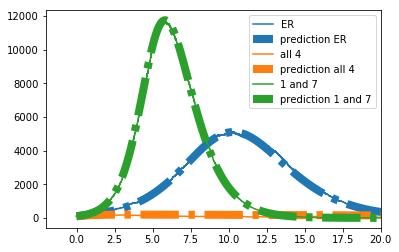

In [22]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

plt.clf()

N=100000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

tmax = 0  #to be fed to the differential equations model.  Need to find 
          #the maximum seen in the loop.
    
ax = plt.gca() #needed because I'm being a bit fancy to make the 
               #color of the prediction match the simulation.
               #You can ignore this if you just
               #remove the color stuff in the loop.
        
for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    
    color = next(ax._get_lines.prop_cycler)['color'] 
    #see https://stackoverflow.com/questions/28779559/how-to-set-same-color-for-markers-and-lines-in-a-matplotlib-plot-loop
    #for an explanation of what's going on with this color stuff.
    
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = rho)
    plt.plot(t, I, label = label, color = color)
    tmax = max(tmax, t[-1])
    calc_t, calc_S, calc_I, calc_R = EoN.SIR_effective_degree_from_graph(
                                 G, tau, gamma, rho = rho, tmax = tmax)


    plt.plot(calc_t, calc_I, '-.', label = 'prediction '+ label, 
             color = color, linewidth = 8)
plt.legend()
plt.axis(xmax = 20)
plt.show()

That's not bad!  If you're interested, you can increase $N$ and see if the fit improves or not.

In fact, it can be proven that these equations are exact in the limit of a large Configuration Model network.

#### Threshold

This is a lot harder to analyze, but it can be shown that the model predicts epidemics if
\begin{equation*}
\frac{\tau}{\tau+\gamma} \frac{\langle K^2-K \rangle}{\langle K \rangle} > 1
\end{equation*}
If I recall, this can be done by proving that this is the condition for $[ISS]$ to be increasing.

The models below are equivalent, and this result is much easier to prove for them.





## Under Construction

I'm going to add 2 more models.  I'm not going to include them as part of the official lectures (though I may give an assignment question which helps you derive one of them).  I'm focusing on getting the SIS notes up now, and will return to these later.


The next few models turn out to be equivalent  to the star-based version assuming a randomly selected initial set of infections.  Some use many more equations than others.  They are all able to accurately predict the dynamics on a Configuration Model Graph.





### Pair-based

#### Comp with sims

#### Threshold

### Edge-based Compartmental Model


## Phase Transitions

Physical systems often undergo significant changes in their behavior as some parameter (e.g., temperature) changes.

Ice turns to liquid water at a threshold temperature.  Below that threshold, it is ice.  Above that threshold it is water.  It's not a continuous change - the properties change drastically.  This is known as a **first-order phase transition**.

If you've made slime before, you have probably noticed a different transition.  A common recipe mixes Borax and glue.  The long branching molecules in the glue start to link up with others when Borax is present.  Not enough Borax, and the properties change smoothly --- perhaps it gets a little more viscous, but there's no gelling.  But there is a threshold where suddenly you start to see a behavior change.  But it's not dramatic like freezing/melting.  It starts to gel.  As you add more Borax, it gets firmer and firmer.  This is known as a **second-order phase transition**.  Physically what is happening is that below a threshold you see lots of small groups of linked molecules.  However, there is no large-scale connection.  Above the threshold, the connection density is high enough that chains of molecules span long distances, but many molecules are not part of these long chains.  As the Borax density increases, more and more molecules join these chains.

So what does this have to do with SIR disease?  Let's start with the discrete SIR model (so transmissions occur independently with probability $p$).  We'll take a bunch of values of $p$ (which will be like the temperature or the Borax concentration above), and run some simulations for each.  Below the threshold we've already calculated, there will be no epidemics.  Above the threshold there will be epidemics.  We'll run simulations with a relatively large number, but small proportion of initial infections.


In [ ]:
import networkx as nx
import EoN
import numpy as np

N= 10000
kave = 4
G = nx.fast_gnp_random_graph(N, kave/(N-1))
sizes = []
ps = np.linspace(0, 1, 101)

for p in ps:
    t, S, I, R = EoN.basic_discrete_SIR(G, p, rho = 0.005)
    sizes.append(R[-1]/N)
    
plt.plot(ps, sizes)
plt.xlabel('$p$')
plt.ylabel('Observed proportion')
plt.show()

This is a second order phase transition.  It becomes clearer if we increase $N$.  We're now going to redo this, but instead of using $p$ as the horizontal axis, we'll use $R_0$, and then we'll do the continuous-time version as well

In [ ]:
import networkx as nx
import EoN
import numpy as np

N= 10000
kave = 4
G = nx.fast_gnp_random_graph(N, kave/(N-1))
discrete_sizes = []
cts_sizes = []
ps = np.linspace(0, 1, 101)

Degs = [G.degree(node) for node in G]
K_factor = sum( deg*deg - deg for deg in Degs)/sum(deg for deg in Degs)
#K_factor = <K^2-K>/<K>

R0s = [p*K_factor for p in ps]

gamma = 1

for p in ps:
    print(p)
    R0 = p*K_factor
    t, S, I, R = EoN.basic_discrete_SIR(G, p, rho = 0.005)
    discrete_sizes.append(R[-1]/N)

    tau = (R0/K_factor)*gamma / (1- R0/K_factor) #divide by zero for the p=1 case
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = 0.005)
    cts_sizes.append(R[-1]/N)
plt.plot(R0s, discrete_sizes, label = 'Discrete')
plt.plot(R0s, cts_sizes, '-.', linewidth = 5, label = 'Continuous')
plt.xlabel('$R_0$')
plt.ylabel('Observed proportion')
plt.legend()
plt.show()

Remarkably the final size appears to depend on $R_0$ but not on whether it is a continuous or discrete time model [**warning** the *probability* of an epidemic does vary depending on which model you use]

The transition is at $R_0=1$.

Let's redo this for the same networks we've been considering

In [ ]:
import networkx as nx
import EoN
import numpy as np

N= 10000

gamma = 1
ps = np.linspace(0,1,101)
for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    print(label)
    discrete_sizes = []
    cts_sizes = []

    Degs = [G.degree(node) for node in G]
    K_factor = sum( deg*deg - deg for deg in Degs)/sum(deg for deg in Degs)
    #K_factor = <K^2-K>/<K>

    R0s = [p*K_factor for p in ps]


    for p in ps:
        R0 = p*K_factor
        t, S, I, R = EoN.basic_discrete_SIR(G, p, rho = 0.005)
        discrete_sizes.append(R[-1]/N)

        tau = (R0/K_factor)*gamma / (1- R0/K_factor) #divide by zero for the p=1 case
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho = 0.005)
        cts_sizes.append(R[-1]/N)
    plt.plot(R0s, discrete_sizes, label = 'Discrete '+label)
    plt.plot(R0s, cts_sizes, '-.', linewidth = 5, label = 'Continuous '+label)


plt.xlabel('$R_0$')
plt.ylabel('Observed proportion')
plt.legend()
plt.show()

So at $R_0=1$ a second-order phase transition occurs.  Note that in all cases the size from the discrete model and the continuous model match, but the different networks have different behaviors.

Can you explain why we don't always have all nodes infected even at $p=1$ (the highest $R_0$ observed for each network)?